In [157]:
grammar = """
sentence = adj noun verb adj noun2
adj = adj_single adj_single | null
adj_single = 漂亮的 | 蓝色 | 好看
adv = 安静的 | 静静的
noun = 猫 | 女人 | 男人
verb = adv 看着 | adv 做着
noun2 =  桌子 | 皮球
"""

In [160]:
def build_grammar(grammar_str, split='='):
    grammar_pattern = {}
    for line in grammar_str.split('\n'):
        if not line: continue
        stmt, expr = line.split(split)
        grammar_pattern[stmt.strip()] = [e.split() for e in expr.split('|')]
    print(grammar_pattern)
    return grammar_pattern

In [161]:
gramma_pattern = build_grammar(grammar)

{'sentence': [['adj', 'noun', 'verb', 'adj', 'noun2']], 'adj': [['adj_single', 'adj_single'], ['null']], 'adj_single': [['漂亮的'], ['蓝色'], ['好看']], 'adv': [['安静的'], ['静静的']], 'noun': [['猫'], ['女人'], ['男人']], 'verb': [['adv', '看着'], ['adv', '做着']], 'noun2': [['桌子'], ['皮球']]}


In [189]:
import random
def generate(gramma_pattern,target):
    if target not in gramma_pattern : return  target
    expr = random.choice(gramma_pattern[target])

    token = [generate(gramma_pattern,e) for e in expr]

    return ''.join( [t for t in token if t != 'null'])



In [191]:
generate(gramma_pattern, 'sentence')

'男人静静的看着桌子'

# BFS 广度优先搜索 DFS 深度优先搜索


# BFS 广度优先搜索 DFS 深度优先搜索
 


In [379]:
graph = {
    'A' :'B B B C', 
    'B' : 'A C', 
    'C' : 'A B D E',
    'D' : 'C',
    'E' : 'C F',
    'F' : 'E'
}

In [380]:
for  node in graph : graph[node] = graph[node].split()

In [388]:
graph

{'A': ['B', 'B', 'B', 'C'],
 'B': ['A', 'C'],
 'C': ['A', 'B', 'D', 'E'],
 'D': ['C'],
 'E': ['C', 'F'],
 'F': ['E']}

In [404]:
visited = []
need_visit=['A',]
def DFS(graph,need_visit):
    while need_visit:
        node = need_visit.pop()
        if node in visited : 
            print('{} has been seen'.format(node))
            continue
        print('I am looking at : {}'.format(node))
        need_visit += graph[node]
        visited.append(node)
        
    

In [405]:
DFS(graph,need_visit)

I am looking at : A
I am looking at : C
I am looking at : E
I am looking at : F
E has been seen
C has been seen
I am looking at : D
C has been seen
I am looking at : B
C has been seen
A has been seen
A has been seen
B has been seen
B has been seen
B has been seen


In [414]:
graph_long = {
    '1': '2 7',
    '2': '3', 
    '3': '4', 
    '4': '5', 
    '5': '6 10', 
    '7': '8',
    '6': '5',
    '8': '9',
    '9': '10', 
    '10': '5 11', 
    '11': '12',
    '12': '11',
}

In [415]:
for n in graph_long: graph_long[n] = graph_long[n].split()

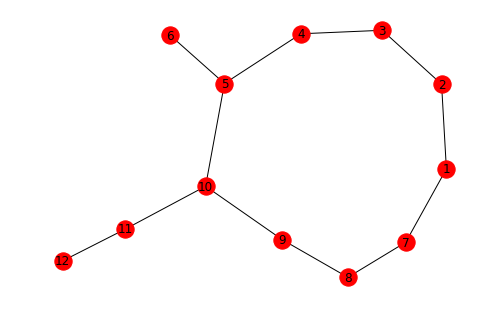

In [416]:
import networkx
import matplotlib.pyplot as plt
%matplotlib inline
Graph_long = networkx.Graph(graph_long)
networkx.draw(Graph_long, with_labels=True)

In [426]:

def search(graph,method):
    visited = []
    need_visit=['A',]
    while need_visit:
        if method == 'DFS':
            node = need_visit.pop()
        elif  method == 'BFS':
            node = need_visit.pop(0)
        if node in visited : 
            print('{} has been seen'.format(node))
            continue
        print('I am looking at : {}'.format(node))
        need_visit.extend(graph[node])
        visited.append(node)

In [427]:
search(graph,'DFS')

I am looking at : A
I am looking at : C
I am looking at : E
I am looking at : F
E has been seen
C has been seen
I am looking at : D
C has been seen
I am looking at : B
C has been seen
A has been seen
A has been seen
B has been seen
B has been seen
B has been seen


In [428]:
search(graph,'BFS')

I am looking at : A
I am looking at : B
B has been seen
B has been seen
I am looking at : C
A has been seen
C has been seen
A has been seen
B has been seen
I am looking at : D
I am looking at : E
C has been seen
C has been seen
I am looking at : F
E has been seen


# Mapping

In [436]:
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'Chiangmai'
SG = 'Singapore'

air_route = {
    BJ : {SZ, GZ, WH, HLG, NY}, 
    GZ : {WH, BJ, CM, SG},
    SZ : {BJ, SG},
    WH : {BJ, GZ},
    HLG : {BJ},
    CM : {GZ},
    NY : {BJ}
}

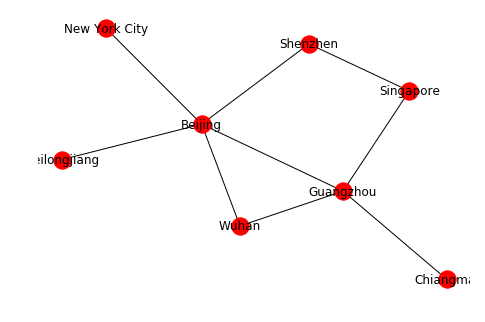

In [437]:
air_route = networkx.Graph(air_route)

networkx.draw(air_route, with_labels=True)

In [438]:
def search_destination(graph, start, destination):
    pathes = [[start]]
    seen = set()
    chosen_pathes = []
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen: continue
        # get new lines
        
        for city in graph[frontier]:
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination: return new_path
        
        seen.add(frontier)
    return chosen_pathes

In [442]:
search_destination(air_route, SZ, CM)

['Shenzhen', 'Beijing', 'Guangzhou', 'Chiangmai']